In [1]:
#import dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Establish CSV path for relevant files
csv_path1 = "../Player Tweets/Jerome Simpson_Trans 1.csv"
csv_path2 = "../Player Tweets/Jerome Simpson_Trans 2.csv"
csv_path3 = "../Player Tweets/Jerome Simpson_Trans 3.csv"
csv_path4 = "../Player Tweets/Jerome Simpson_Trans 4.csv"
csv_path5 = "../Player Tweets/Jerome Simpson_Trans 5.csv"

#Establish pd dataframe for each file
jeromesimpson1 = pd.read_csv(csv_path1, sep=";")
jeromesimpson2 = pd.read_csv(csv_path2, sep=";", error_bad_lines=False)
jeromesimpson3 = pd.read_csv(csv_path3, sep=";", error_bad_lines=False)
jeromesimpson4 = pd.read_csv(csv_path4, sep=";")
jeromesimpson5 = pd.read_csv(csv_path5, sep=";")

#concatenate data frames
jeromesimpson_master = pd.concat([jeromesimpson1, jeromesimpson2, jeromesimpson3, jeromesimpson4, jeromesimpson5])
jeromesimpson_master

b'Skipping line 78: expected 10 fields, saw 11\nSkipping line 1467: expected 10 fields, saw 11\nSkipping line 2189: expected 10 fields, saw 11\n'
b'Skipping line 458: expected 10 fields, saw 11\n'


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2008-04-26 20:24,0,0,Beginning To Appreciate Cincinnati Bengals 2nd...,NaN,NaN,NaN,7.977729e+08,https://twitter.com/CherieLampley/status/79777...
1,NaN,2008-04-26 19:43,0,0,beginning to like the Bengals picking of Jerom...,NaN,NaN,NaN,7.977555e+08,https://twitter.com/CherieLampley/status/79775...
2,NaN,2008-04-26 19:15,0,0,Draft Update: Browns still quiet as Round 2 co...,NaN,NaN,NaN,7.977444e+08,https://twitter.com/TheOBR/status/797744377
3,NaN,2008-04-26 18:43,0,0,The Cincinnati Bengals have selected Jerome Si...,NaN,NaN,NaN,7.977314e+08,https://twitter.com/MiamiHerald/status/797731401
4,NaN,2008-04-26 18:41,0,0,"With the 46th pick, the Cincinnati Bengals sel...",NaN,NaN,NaN,7.977306e+08,https://twitter.com/headblitz/status/797730603
0,NaN,2012-04-30 18:49,0,0,"Jerome Simpson's contract is worth $2 million,...",NaN,NaN,#,1.971105e+17,https://twitter.com/FreeAgentNews/status/19711...
1,NaN,2012-04-30 18:48,0,0,If Jerome Simpson is productive this year he c...,NaN,NaN,#,1.971101e+17,https://twitter.com/Vikings_Talk1/status/19711...
2,NaN,2012-04-30 18:45,0,0,“ @ ProFootballTalk: Jerome Simpsons contract ...,NaN,@,NaN,1.971094e+17,https://twitter.com/EvilMikeTomlin/status/1971...
3,NaN,2012-04-30 18:42,11,1,"Jerome Simpson's contract is worth $2 million,...",NaN,NaN,NaN,1.971087e+17,https://twitter.com/ProFootballTalk/status/197...
4,NaN,2012-04-30 18:42,11,1,"Jerome Simpson's contract is worth $2 million,...",NaN,NaN,NaN,1.971087e+17,https://twitter.com/ProFootballTalk/status/197...


In [2]:
#fillna's with text to fix error
jeromesimpson_master["text"].fillna("text", inplace=True)
jeromesimpson_master.head()


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2008-04-26 20:24,0,0,Beginning To Appreciate Cincinnati Bengals 2nd...,NaN,NaN,NaN,797772906.0,https://twitter.com/CherieLampley/status/79777...
1,NaN,2008-04-26 19:43,0,0,beginning to like the Bengals picking of Jerom...,NaN,NaN,NaN,797755464.0,https://twitter.com/CherieLampley/status/79775...
2,NaN,2008-04-26 19:15,0,0,Draft Update: Browns still quiet as Round 2 co...,NaN,NaN,NaN,797744377.0,https://twitter.com/TheOBR/status/797744377
3,NaN,2008-04-26 18:43,0,0,The Cincinnati Bengals have selected Jerome Si...,NaN,NaN,NaN,797731401.0,https://twitter.com/MiamiHerald/status/797731401
4,NaN,2008-04-26 18:41,0,0,"With the 46th pick, the Cincinnati Bengals sel...",NaN,NaN,NaN,797730603.0,https://twitter.com/headblitz/status/797730603


In [3]:
#create list of sentiment scores associated with tweets about relevant player

jeromesimpson_sent = []

tweets = jeromesimpson_master["text"]

for index,tweet in jeromesimpson_master.iterrows():
    results = analyzer.polarity_scores(tweet["text"])
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
        
    # Add sentiments for each tweet into an array
    jeromesimpson_sent.append({"date": tweet["date"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg})
jeromesimpson_sent



[{'Compound': 0.4019,
  'Negative': 0.847,
  'Neutral': 0.0,
  'Positive': 0.153,
  'date': '2008-04-26 20:24'},
 {'Compound': 0.3612,
  'Negative': 0.783,
  'Neutral': 0.0,
  'Positive': 0.217,
  'date': '2008-04-26 19:43'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2008-04-26 19:15'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2008-04-26 18:43'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2008-04-26 18:41'},
 {'Compound': 0.1154,
  'Negative': 0.921,
  'Neutral': 0.0,
  'Positive': 0.079,
  'date': '2012-04-30 18:49'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2012-04-30 18:48'},
 {'Compound': 0.2263,
  'Negative': 0.899,
  'Neutral': 0.0,
  'Positive': 0.101,
  'date': '2012-04-30 18:45'},
 {'Compound': 0.1154,
  'Negative': 0.906,
  'Neutral': 0.0,
  'Positive': 0.094,
  'date': '2012-04-30 18:42'},
 {'Compound

In [4]:
# Convert player sentiments to DataFrame
JS_pd = pd.DataFrame.from_dict(jeromesimpson_sent)
JS_pd.head()

,Compound,Negative,Neutral,Positive,date
0,0.4019,0.847,0.0,0.153,2008-04-26 20:24
1,0.3612,0.783,0.0,0.217,2008-04-26 19:43
2,0.0000,1.000,0.0,0.000,2008-04-26 19:15
3,0.0000,1.000,0.0,0.000,2008-04-26 18:43
4,0.0000,1.000,0.0,0.000,2008-04-26 18:41


In [5]:
# merge sentiment data frame and master player tweet file

merged = pd.merge(jeromesimpson_master, JS_pd, on="date", how="outer")
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive
0,NaN,2008-04-26 20:24,0,0,Beginning To Appreciate Cincinnati Bengals 2nd...,NaN,NaN,NaN,797772906.0,https://twitter.com/CherieLampley/status/79777...,0.4019,0.847,0.0,0.153
1,NaN,2008-04-26 19:43,0,0,beginning to like the Bengals picking of Jerom...,NaN,NaN,NaN,797755464.0,https://twitter.com/CherieLampley/status/79775...,0.3612,0.783,0.0,0.217
2,NaN,2008-04-26 19:15,0,0,Draft Update: Browns still quiet as Round 2 co...,NaN,NaN,NaN,797744377.0,https://twitter.com/TheOBR/status/797744377,0.0000,1.000,0.0,0.000
3,NaN,2008-04-26 18:43,0,0,The Cincinnati Bengals have selected Jerome Si...,NaN,NaN,NaN,797731401.0,https://twitter.com/MiamiHerald/status/797731401,0.0000,1.000,0.0,0.000
4,NaN,2008-04-26 18:41,0,0,"With the 46th pick, the Cincinnati Bengals sel...",NaN,NaN,NaN,797730603.0,https://twitter.com/headblitz/status/797730603,0.0000,1.000,0.0,0.000


In [6]:
# remove time from datetime to be able to groupby an individual day
pd.DatetimeIndex(merged.date).normalize()
merged['date_new'] = pd.DatetimeIndex(merged.date).normalize()
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive,date_new
0,NaN,2008-04-26 20:24,0,0,Beginning To Appreciate Cincinnati Bengals 2nd...,NaN,NaN,NaN,797772906.0,https://twitter.com/CherieLampley/status/79777...,0.4019,0.847,0.0,0.153,2008-04-26
1,NaN,2008-04-26 19:43,0,0,beginning to like the Bengals picking of Jerom...,NaN,NaN,NaN,797755464.0,https://twitter.com/CherieLampley/status/79775...,0.3612,0.783,0.0,0.217,2008-04-26
2,NaN,2008-04-26 19:15,0,0,Draft Update: Browns still quiet as Round 2 co...,NaN,NaN,NaN,797744377.0,https://twitter.com/TheOBR/status/797744377,0.0000,1.000,0.0,0.000,2008-04-26
3,NaN,2008-04-26 18:43,0,0,The Cincinnati Bengals have selected Jerome Si...,NaN,NaN,NaN,797731401.0,https://twitter.com/MiamiHerald/status/797731401,0.0000,1.000,0.0,0.000,2008-04-26
4,NaN,2008-04-26 18:41,0,0,"With the 46th pick, the Cincinnati Bengals sel...",NaN,NaN,NaN,797730603.0,https://twitter.com/headblitz/status/797730603,0.0000,1.000,0.0,0.000,2008-04-26


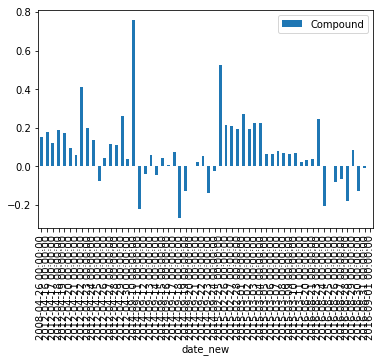

In [7]:
#plot groupby *x axis = day, y axis = compound sentiment score*
grouped = merged.groupby(['date_new'])
grouped.mean().reset_index().plot.bar("date_new", "Compound")
plt.savefig('jeromesimpson.png')
plt.show()
